In [6]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

df = pd.read_csv("Iris.csv")

In [2]:
missing_data = df.isnull()

In [3]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

Id
False    150
Name: Id, dtype: int64

SepalLengthCm
False    150
Name: SepalLengthCm, dtype: int64

SepalWidthCm
False    150
Name: SepalWidthCm, dtype: int64

PetalLengthCm
False    150
Name: PetalLengthCm, dtype: int64

PetalWidthCm
False    150
Name: PetalWidthCm, dtype: int64

Species
False    150
Name: Species, dtype: int64



<p>Therefore no missing data</p>

### 1)

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### 2)

In [5]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

### 3)

In [6]:
df['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

### 4)

In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### 5)

In [4]:
a = pearsonr(df['SepalLengthCm'],df['SepalWidthCm'])
print(a)
df.corr()

(-0.10936924995064937, 0.1827652152713699)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


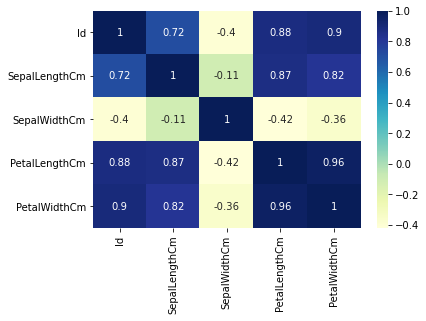

In [10]:
dataplot=sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)

### 6)

In [11]:
df['PetalWidthCm'].unique()

array([0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, 1.6, 1. , 1.1, 1.8,
       1.2, 1.7, 2.5, 1.9, 2.1, 2.2, 2. , 2.4, 2.3])

<p>The samllest length in the array is 0.1 ans the longest length in the array is 2.4<p/>

### 7)

In [3]:
df_group_one = df[['PetalWidthCm','PetalLengthCm']]

In [4]:
df_group_one = df_group_one.groupby(['PetalWidthCm'],as_index=False).mean()
df_group_one

,PetalWidthCm,PetalLengthCm
0,0.1,1.416667
1,0.2,1.442857
2,0.3,1.428571
3,0.4,1.571429
4,0.5,1.700000
5,0.6,1.600000
6,1.0,3.628571
7,1.1,3.566667
8,1.2,4.240000
9,1.3,4.176923


### 8)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline 

#### a)

<AxesSubplot:xlabel='PetalLengthCm', ylabel='SepalLengthCm'>

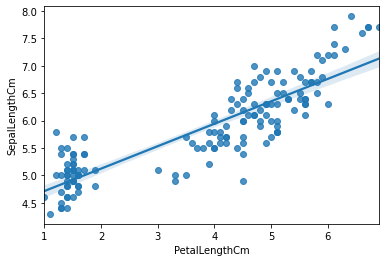

In [13]:
sns.regplot(x='PetalLengthCm', y='SepalLengthCm', data=df)

<p>As the PetalLengthCm goes up, the SepalLengthCm goes up, this indicates a positive direct correlation between these two variables. PetalLengthCm seems like a pretty good predictor of SepalLengthCm since the regression line is almost a perfect diagonal line.</p>

In [11]:
df[["PetalLengthCm", "SepalLengthCm"]].corr()

,PetalLengthCm,SepalLengthCm
PetalLengthCm,1.000000,0.871754
SepalLengthCm,0.871754,1.000000


In [17]:
pearson_coef, p_value = stats.pearsonr(df['PetalLengthCm'], df['SepalLengthCm'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8717541573048713  with a P-value of P = 1.0384540627941062e-47


<p>Since the p-value is  <  0.001, the correlation between PetalLengthCm and SepalLengthCm is statistically significant, and the linear relationship is quite strong (~0.871, close to 1).</p>

#### b)

<AxesSubplot:xlabel='SepalWidthCm', ylabel='SepalLengthCm'>

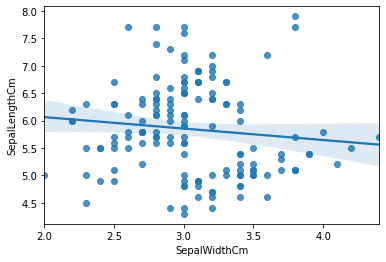

In [14]:
sns.regplot(x='SepalWidthCm', y='SepalLengthCm', data=df)

<p>SepalWidthCm does not seem like a good predictor of the SepalLengthCm at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore, it's not a reliable variable.</p>

In [15]:
df[["SepalWidthCm", "SepalLengthCm"]].corr()

,SepalWidthCm,SepalLengthCm
SepalWidthCm,1.000000,-0.109369
SepalLengthCm,-0.109369,1.000000


In [18]:
pearson_coef, p_value = stats.pearsonr(df['SepalWidthCm'], df['SepalLengthCm'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.10936924995064937  with a P-value of P = 0.1827652152713699


<p>Since the p-value is > 0.1, there is no evidence that the correlation between SepalWidthCm and SepalLengthCm is significant, and even the linear relationship is week</p>

### 9)

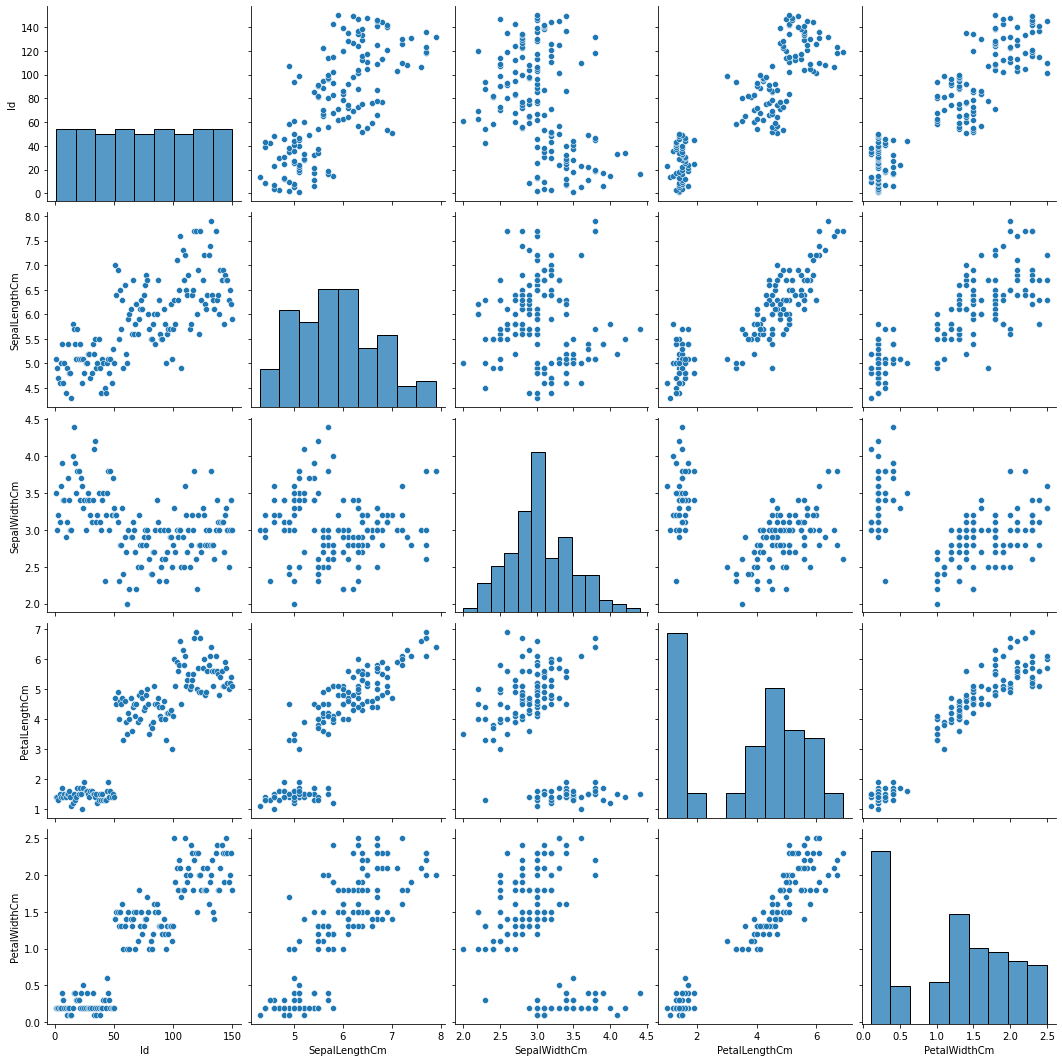

In [11]:
sns.pairplot(df, hue=None, height=3)

### 10)

In [5]:
new_df = df[['Species', 'PetalLengthCm']].groupby(['Species'])
new_df.head(1)

,Species,PetalLengthCm
0,Iris-setosa,1.4
50,Iris-versicolor,4.7
100,Iris-virginica,6.0


In [9]:
f_val, p_val = stats.f_oneway(new_df.get_group('Iris-setosa')['PetalLengthCm'], new_df.get_group('Iris-versicolor')['PetalLengthCm'], new_df.get_group('Iris-virginica')['PetalLengthCm'])  
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 1179.0343277002194 , P = 3.0519758018278374e-91


This is a great result with a large F-test score showing a strong correlation and a P-value of almost 0 implying almost certain statistical significance.

In [10]:
f_val, p_val = stats.f_oneway(new_df.get_group('Iris-setosa')['PetalLengthCm'], new_df.get_group('Iris-versicolor')['PetalLengthCm'])  
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 1557.7753269568584 , P = 5.717463758171091e-62


In [11]:
f_val, p_val = stats.f_oneway(new_df.get_group('Iris-versicolor')['PetalLengthCm'], new_df.get_group('Iris-virginica')['PetalLengthCm'])  
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 158.8552562070785 , P = 3.1788195478063596e-22


In [12]:
f_val, p_val = stats.f_oneway(new_df.get_group('Iris-setosa')['PetalLengthCm'], new_df.get_group('Iris-virginica')['PetalLengthCm'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 2496.5715121951253 , P = 1.5641224158882883e-71


This mean all three tested groups are all this highly correlated